In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
from helper import generate_batches

x_train = np.linspace(-5.,5., 500)
y_train = 0.5 * x_train + 2.0

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * ( w[0] * x_set[i] + w[1] - y_set[i] )**2
    return val / N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

# SGD
print("===============SGD==============")
w0 = np.array([4.0, -1.0])
batch_size = 10
lr = 0.01
MaxEpochs = 50
path_sgd = []
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]
for epoch in range(MaxEpochs):
    print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr * grad
        w0 = w1

# Momentum
print("===============Momentum==============")
w0 = np.array([4.0, -1.0])
batch_size = 10
MaxEpochs = 50
path_mm = []
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

alpha = .9
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr * grad
        w1 = w0 + velocity
        w0 = w1

# Nestrov
print("===============Nestrov==============")
w0 = np.array([4.0, -1.0])
batch_size = 10
MaxEpochs = 50
path_nm = []
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

alpha = .9
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_nm.append(w0)
        grad = loss_grad(w0 + alpha * velocity, x_batch, y_batch)
        velocity = alpha * velocity - lr * grad
        w1 = w0 + velocity
        w0 = w1

# Adam
print("===============Adam==============")
w0 = np.array([4.0, -1.0])
batch_size = 10
ep = 1
rho1 = .9
rho2 = .999
delta = 1e-8
MaxEpochs = 50
path_adam = []
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]
t = 0
s = np.zeros_like(w0)
r = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        t += 1
        s = rho1 * s + (1 - rho1) * grad
        r = rho2 * r + (1 - rho2) * grad * grad
        shat = s / (1 - rho1**t)
        rhat = r / (1 - rho2**t)
        w1 = w0 - ep * shat / (np.linalg.norm(rhat) + delta)
        w0 = w1

===============SGD==============
0 [ 4. -1.] 55.746242485
1 [ 0.53410207  0.16538577] 1.68776973304
2 [ 0.49485646  0.89113595] 0.614900418022
3 [ 0.49657328  1.32994838] 0.224533707093
4 [ 0.49792541  1.59511089] 0.0819855993326
5 [ 0.49874635  1.75533949] 0.0299359581644
6 [ 0.49924246  1.8521601 ] 0.010930719295
7 [ 0.49954224  1.91066545] 0.00399120761727
8 [ 0.49972339  1.94601821] 0.001457336687
9 [ 0.49983286  1.96738067] 0.00053212722137
10 [ 0.499899    1.98028926] 0.000194299218738
11 [ 0.49993897  1.98808948] 7.09457905666e-05
12 [ 0.49996312  1.99280289] 2.59049173323e-05
13 [ 0.49997772  1.99565103] 9.45883803157e-06
14 [ 0.49998653  1.99737207] 3.45376963609e-06
15 [ 0.49999186  1.99841203] 1.26109831454e-06
16 [ 0.49999508  1.99904045] 4.60473374462e-07
17 [ 0.49999703  1.99942017] 1.68135763995e-07
18 [ 0.4999982   1.99964963] 6.13925510181e-08
19 [ 0.49999892  1.99978828] 2.24166782305e-08
20 [ 0.49999934  1.99987207] 8.1851536473e-09
21 [ 0.4999996   1.99992269] 2.988

In [3]:
W0 = np.linspace(-2, 5, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

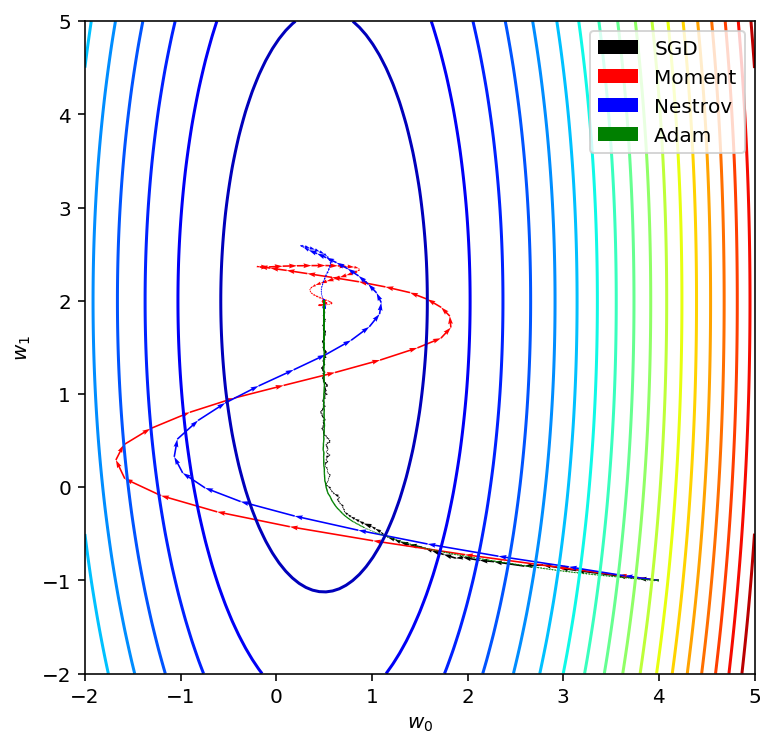

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()),20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], \
          paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], \
          paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

paths = path_nm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], \
          paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='b')

paths = path_adam
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], \
          paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='g')

plt.legend(['SGD', 'Moment', 'Nestrov', 'Adam'])
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.show()